In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Necessary to import pypwaves_updated.py from parent directory
import sys
sys.path.append('../')
import pypwaves_updated as pw

In [2]:
# Load data - Choose one

#Dublin data
#pls_file_dublin = "../../Data/dublin_sample/F_150326_125917.pls"
#pulsewave = pw.openPLS(pls_file_dublin)

#Brooklyn data
pls_file_laptop = "../../Data/164239_pls/10552_NYU_M2_Pulse_Waves_MTA_Resolved - Scanner 1 - 190511_164239_1 - originalpoints.pls"
pulsewave = pw.openPLS(pls_file_laptop)

#pls_file_linux = "../../Data/161726/10552_NYU_M2_Pulse_Waves_MTA_Resolved - Scanner 1 - 190511_161726_1 - originalpoints.pls"
#pulsewave = pw.openPLS(pls_file_linux)

### Looking at anchor points
I'm trying to determine whether or not anchor points indicate the location of the emitter when the pulse is sent/received, or is an arbitrary point.

In [3]:
def pull_pulses(pulsewave,pulse_count=None):
    '''this function extracts full pulse records into a dataframe'''
def pull_anchors(pulsewave,pulse_count=None):
    '''this function collects the x,y, and z anchors for each point in the pulsewave object.'''
    # Extract all the anchor points in each dimension
    if pulse_count == None:
        x_anchors = [pulsewave.get_pulse(i).x_anchor for i in range(pulsewave.num_pulses)]
        y_anchors = [pulsewave.get_pulse(i).y_anchor for i in range(pulsewave.num_pulses)]
        z_anchors = [pulsewave.get_pulse(i).z_anchor for i in range(pulsewave.num_pulses)]
    else:
        x_anchors = [pulsewave.get_pulse(i).x_anchor for i in range(1000,pulse_count+1000)]
        y_anchors = [pulsewave.get_pulse(i).y_anchor for i in range(1000,pulse_count+1000)]
        z_anchors = [pulsewave.get_pulse(i).z_anchor for i in range(1000,pulse_count+1000)]

    # Create numpy array and pandas DF for easier manipulation
    anchor_arr = np.array([x_anchors,y_anchors,z_anchors])
    anchor_df = pd.DataFrame(anchor_arr.T,columns=['x','y','z'])
    return anchor_df

def denoise(df,low_quantile,high_quantile):
    '''takes the output of pull_anchors function, removes the outliers based on quantiles.'''
    quantile_10 = df.quantile(low_quantile)
    quantile_90 = df.quantile(high_quantile)
    df_denoised = df[df['x']>=quantile_10['x']]
    df_denoised = df_denoised[df_denoised['y']>=quantile_10['y']]
    df_denoised = df_denoised[df_denoised['z']>=quantile_10['z']]
    df_denoised = df_denoised[df_denoised['x']<=quantile_90['x']]
    df_denoised = df_denoised[df_denoised['y']<=quantile_90['y']]
    df_denoised = df_denoised[df_denoised['z']<=quantile_90['z']]
    return df_denoised

In [ ]:
#anchor_df = pull_anchors(pulsewave)
#anchor_df.to_pickle("anchor_points_164239.pkl")

anchor_df = pd.read_pickle("anchor_points_164239.pkl")

In [ ]:
# I'm comparing the min and max to the 0.1 and 0.9 quantiles...
anchor_df.describe()

In [ ]:
anchor_df.quantile([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9])

## Dublin Data

In [ ]:
# Extract all the timestamps
# gps_time = [pulsewave.get_pulse(i).gps_timestamp for i in range(300000,500000)]
# x_anchor = [pulsewave.get_pulse(i).x_anchor for i in range(300000,500000)]
# y_anchor = [pulsewave.get_pulse(i).y_anchor for i in range(300000,500000)]
# z_anchor = [pulsewave.get_pulse(i).z_anchor for i in range(300000,500000)]

# gps_arr = np.array([gps_time,x_anchor,y_anchor,z_anchor])
# gps_df = pd.DataFrame(gps_arr.T,columns=['gps_time','x_anchor','y_anchor','z_anchor'])
#gps_df.to_pickle("gps_time_164239.pkl")

In [ ]:
# Sort dataframe by gps_time
gps_sorted = gps_df.sort_values(by=['gps_time'])

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(4, 1, 1)
plt.plot(range(200000),gps_sorted['gps_time'])
plt.ylabel("GPS Time")
plt.title("Dublin sample run")

plt.subplot(4, 1, 2)
plt.plot(gps_sorted['gps_time'],gps_sorted['x_anchor'])
plt.ylabel("X Anchor")

plt.subplot(4, 1, 3)
plt.plot(gps_sorted['gps_time'],gps_sorted['y_anchor'])
plt.ylabel("Y Anchor")
plt.xlabel("Pulse Record")

plt.subplot(4, 1, 4)
plt.plot(gps_sorted['gps_time'],gps_sorted['z_anchor'])
plt.ylabel("Z Anchor")
plt.xlabel("Pulse Record")

## Brooklyn Data

In [10]:
time = pd.read_pickle("gps_time_164239.pkl")
anchors = pd.read_pickle("anchor_points_164239.pkl")
anchors["gps_time"]=time
anchors.sort_values(by=['gps_time'],inplace=True)

Text(0.5, 0, 'GPS Time')

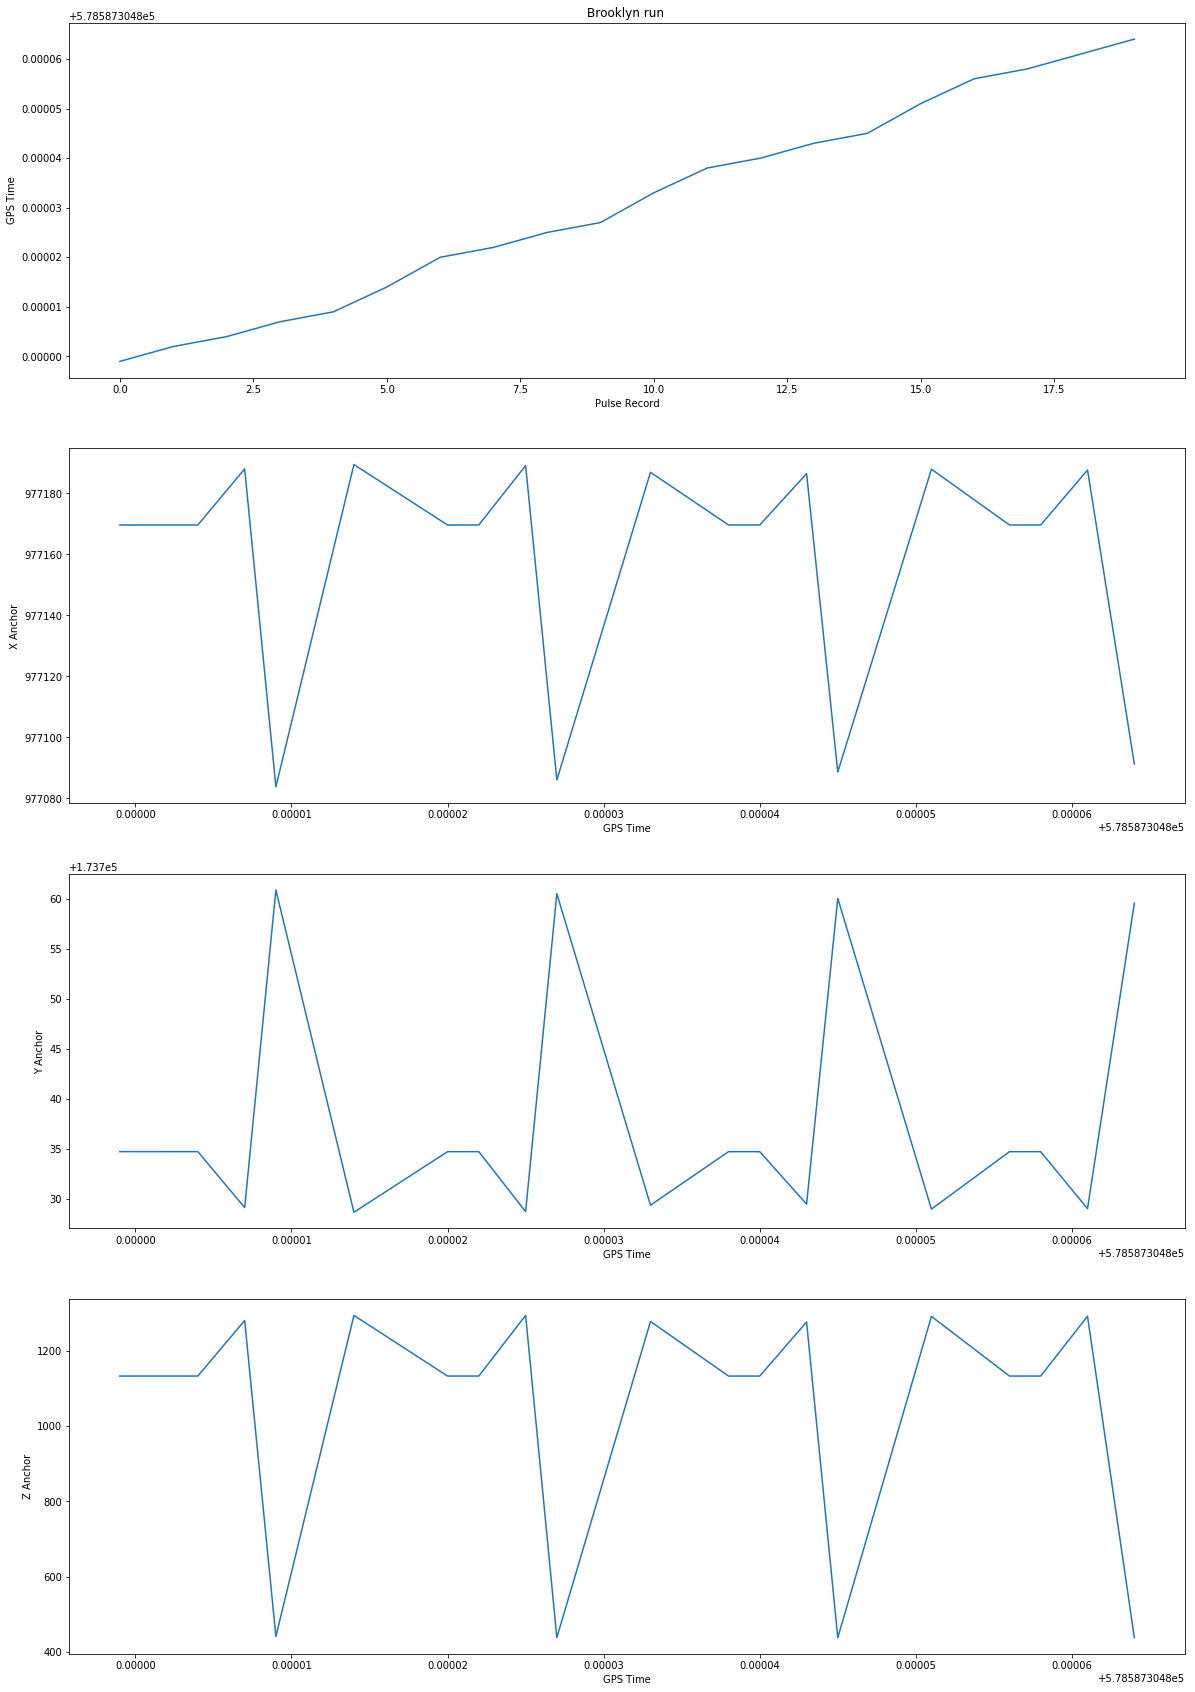

In [55]:
anchors_mill = anchors[3800080:3800100]
plt.figure(figsize=(20,30))
plt.subplot(4, 1, 1)
plt.plot(range(len(anchors_mill)),anchors_mill['gps_time'])
plt.ylabel("GPS Time")
plt.xlabel("Pulse Record")
plt.title("Brooklyn run ")

plt.subplot(4, 1, 2)
plt.plot(anchors_mill['gps_time'],anchors_mill['x'])
plt.ylabel("X Anchor")
plt.xlabel("GPS Time")

plt.subplot(4, 1, 3)
plt.plot(anchors_mill['gps_time'],anchors_mill['y'])
plt.ylabel("Y Anchor")
plt.xlabel("GPS Time")

plt.subplot(4, 1, 4)
plt.plot(anchors_mill['gps_time'],anchors_mill['z'])
plt.ylabel("Z Anchor")
plt.xlabel("GPS Time")

In [13]:
# Outlier
pulsewave.get_pulse(8777438).print_table()

gps_timestamp :  578576.706901
offset_to_waves :  1450374249
x_anchor :  977137.541
y_anchor :  174731.15
z_anchor :  1223.83875
x_target :  977182.81375
y_target :  174720.161
z_target :  1081.41075
first_return :  -275
last_return :  2265
pulse_number :  8777438
pulse_descriptor :  200006
reserved :  [0, 0, 0, 0]
edge :  0
scan_direction :  0
facet :  [1, 1]
intensity :  0
classification :  0
dx :  0.04527275000000373
dy :  -0.010989000000001397
dz :  -0.1424279999999999


In [42]:
# Outlier
pulsewave.get_pulse(2777439).print_table()

gps_timestamp :  578588.405836
offset_to_waves :  468519660
x_anchor :  977165.273
y_anchor :  173632.49
z_anchor :  1119.6205
x_target :  977096.71775
y_target :  173646.02175
z_target :  987.0565
first_return :  34
last_return :  93
pulse_number :  2777439
pulse_descriptor :  200002
reserved :  [0, 0, 0, 0]
edge :  0
scan_direction :  0
facet :  [1, 1]
intensity :  0
classification :  0
dx :  -0.0685552500000922
dy :  0.013531750000023749
dz :  -0.13256399999999996


In [29]:
pulsewave.get_pulse(8777440).print_table()

gps_timestamp :  578576.7069079999
offset_to_waves :  1450374705
x_anchor :  977165.93525
y_anchor :  174724.25725
z_anchor :  1134.50325
x_target :  977211.43825
y_target :  174713.21875
z_target :  992.15225
first_return :  0
last_return :  0
pulse_number :  8777440
pulse_descriptor :  200003
reserved :  [0, 0, 0, 0]
edge :  0
scan_direction :  0
facet :  [1, 1]
intensity :  0
classification :  0
dx :  0.04550300000002608
dy :  -0.011038499999995111
dz :  -0.142351


In [61]:
print("anchors shape: ",anchors.shape)
less = sum(anchors['z']<600)
more = sum(anchors['z']>600)
waymore = sum(anchors['z']>1200)
print(less)
print(more)
print(waymore)
print(less+more)
print("Percent below 600: ",less*100/(less+more))

anchors shape:  (10710919, 4)
1239692
9471227
1291996
10710919
Percent below 600:  11.574095556132951


### Wave plotting

In [ ]:
wave = pulsewave.get_waves(5)
wave.plot()

In [ ]:
wave.smooth(7,3)
wave.plot()

In [ ]:
wave = pulsewave.get_waves(50)
type(wave)

In [ ]:
# pulse = pulsewave.get_pulse(10000)
# pulse.x_target

In [ ]:
# for key in pulsewave.vlrs[34735].record.key_entry_dict.keys():
#     print(pulsewave.vlrs[34735].record.key_entry_dict[key])

In [ ]:
# for key in pulsewave.vlrs[34735].record.key_entry_dict:
#     tiff_tag = pulsewave.vlrs[34735].record.key_entry_dict[key].tiff_tag_location
#     if tiff_tag == 34736:
#         offset_6 = pulsewave.vlrs[34735].record.key_entry_dict[key].value_offset
#         value_6 = pulsewave.vlrs[34736].record[offset_6]
#         pulsewave.vlrs[34735].record.key_entry_dict[key].value = value_6
#     elif tiff_tag == 34737:
#         offset_7 = pulsewave.vlrs[34735].record.key_entry_dict[key].value_offset
#         len_7 = pulsewave.vlrs[34735].record.key_entry_dict[key].count
#         value_7 = pulsewave.vlrs[34737].record[offset_7:(offset_7+len_7)]
#         pulsewave.vlrs[34735].record.key_entry_dict[key].value = value_7
#     else:
#         pulsewave.vlrs[34735].record.key_entry_dict[key].value = pulsewave.vlrs[34735].record.key_entry_dict[key].value_offset

In [ ]:
# for key in pulsewave.vlrs[34735].record.key_entry_dict:
#     print(pulsewave.vlrs[34735].record.key_entry_dict[key].value)

In [ ]:
header_attrs = ['filename',
'file_sig',
'global_params',
'file_id',
'proj_GUID1',
'proj_GUID2',
'proj_GUID3',
'proj_GUID3',
'sys_id',
'software',
'file_day',
'file_year',
'version_maj',
'version_min',
'header_size',
'offset_to_pulses',
'num_pulses',
'pulse_format',
'pulse_attr',
'pulse_size',
'pulse_compression',
'reserved',
'num_vlr',
'num_avlr',
't_scale',
't_offset',
't_min',
't_max',
'x_scale',
'y_scale',
'z_scale',
'x_offset',
'y_offset',
'z_offset',
'x_min',
'x_max',
'y_min',
'y_max',
'z_min',
'z_max',]

def print_pulsewaves_header(pulsewave,header_attrs):
    '''prints all the header attribtes of a PulseWaves class.'''
    for attr in header_attrs:
        print(attr,": ",getattr(pulsewave,attr))

In [ ]:
print_header(pulsewave,header_attrs)

In [ ]:
pulse_record_attrs = ['gps_timestamp', 
'offset_to_waves', 
'x_anchor', 
'y_anchor', 
'z_anchor', 
'x_target', 
'y_target', 
'z_target', 
'first_return', 
'last_return', 
'pulse_number', 
'pulse_descriptor', 
'reserved', 
'edge', 
'scan_direction', 
'facet', 
'intensity', 
'classification', 
'dx', 
'dy', 
'dz']
pulse = pulsewave.get_pulse(123)

In [ ]:
for attr in pulse_record_attrs:
    print(attr,": ",getattr(pulse,attr))

In [ ]:
pulse = pulsewave.get_pulse(123)

In [ ]:
pulse.print_table()